In [60]:
import requests
import numpy as np
import json
import pandas as pd
from sklearn.manifold import TSNE

import matplotlib
import matplotlib.pyplot as plt

In [50]:
def get_emb(word):
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {OPENAI_API_KEY}"
    }
    data = {
        "input": word,
        "model": "text-embedding-ada-002"
    }
    response = requests.post("https://api.openai.com/v1/embeddings", json=data, headers=headers)
    return np.array(response.json()["data"][0]["embedding"])

def get_distance(word1, word2):
    emb1 = get_word_embedding(word1)
    emb2 = get_word_embedding(word2)
    # cosine similarity
    similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
    return similarity

# def euclidean_dist(emb1, emb2):
#     distance = np.linalg.norm(emb1 - emb2)
#     return distance


In [62]:
OPENAI_API_KEY = input("API key: ")

In [52]:
len(get_word_embedding("dog"))

1536

game

In [53]:
turns = 1
embeddings = []
players = []

while True:
    player1_word = input("Player 1, enter your word: ").strip()
    player2_word = input("Player 2, enter your word: ").strip()

    embeddings.append(get_emb(player1_word))
    players.append('Player 1')
    embeddings.append(get_emb(player2_word))
    players.append('Player 2')

    if player1_word == player2_word:
        print(f"Congratulations! You both chose {player1_word} in {turns} turn(s).")
        break

    distance = get_distance(player1_word, player2_word)
    print(distance)
    turns += 1

0.8635742232591531
Congratulations! You both chose dog in 2 turn(s).


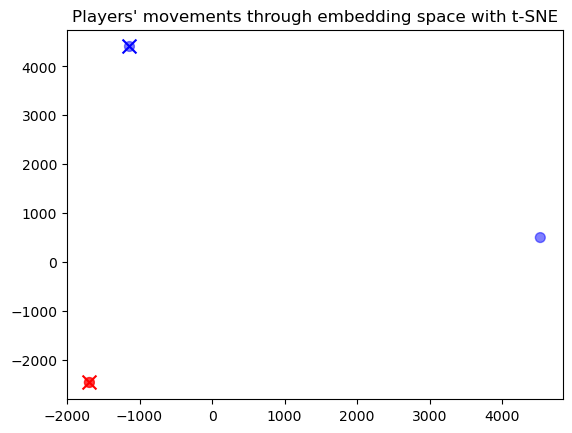

In [61]:
# Create DataFrame
df = pd.DataFrame({'emb': embeddings, 'player': players})

# Visualization
mat = np.array(df.emb.to_list())
perplexity = min(5, turns - 1)
vis = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(mat)

colors = ["red", "blue"]
x, y = vis[:, 0], vis[:, 1]
color_indices = df.player.map({'Player 1': 0, 'Player 2': 1}).values

plt.scatter(x, y, c=color_indices, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5, s=50)

# Mark the ending point
plt.scatter(x[-2], y[-2], marker='x', color=colors[0], s=100)
plt.scatter(x[-1], y[-1], marker='x', color=colors[1], s=100)

plt.title("embedding space")  # t-SNE
plt.show()

In [56]:
df

,emb,player
0,"[-0.003346655, -0.017767696, -0.015915204, -0....",Player 1
1,"[-0.0070234784, -0.017333334, -0.009631996, -0...",Player 2
2,"[-0.003346655, -0.017767696, -0.015915204, -0....",Player 1
3,"[-0.0033572898, -0.017774882, -0.015882498, -0...",Player 2
